## Regressão com o Conjunto de Dados da Habitação da Califórnia

Devido às preocupações éticas associadas ao conjunto de dados Boston Housing, discutido no repositório URL_REPO vamos usar o conjunto de dados da habitação da Califórnia para explorar problemas de regressão.

In [4]:
from sklearn.datasets import fetch_california_housing
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Carregar o conjunto de dados da habitação da Califórnia
california_data = fetch_california_housing()
california_df = pd.DataFrame(data=california_data.data, columns=california_data.feature_names)
california_df['MedHouseValue'] = california_data.target

# Exibir as primeiras linhas do dataframe
california_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseValue
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


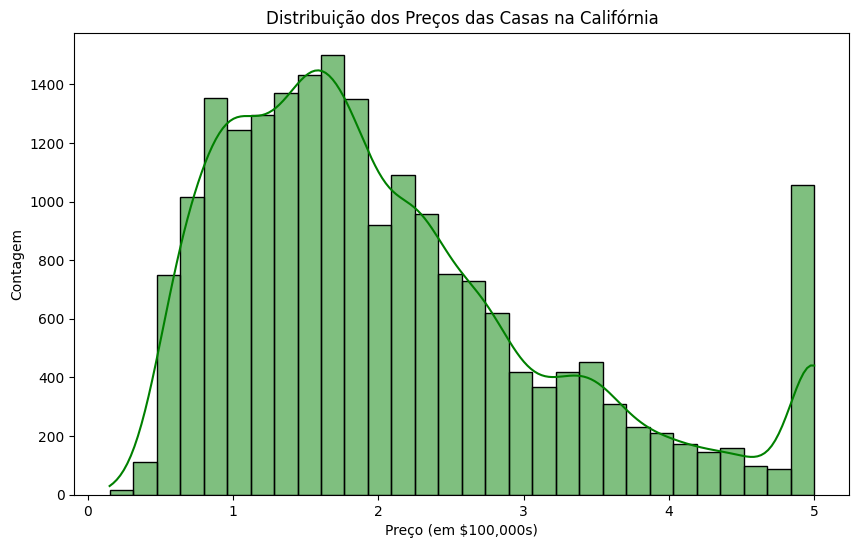

In [5]:
# Visualizar a distribuição dos preços das casas (MedHouseValue)
plt.figure(figsize=(10, 6))
sns.histplot(california_df['MedHouseValue'], bins=30, kde=True, color='green')
plt.title('Distribuição dos Preços das Casas na Califórnia')
plt.xlabel('Preço (em $100,000s)')
plt.ylabel('Contagem')
plt.show()